In [1]:
%matplotlib inline
from pyvista import set_plot_theme
set_plot_theme('document')

In [2]:
import numpy as np
import pyvista as pv
import matplotlib.pyplot as plt
from itkwidgets import cm
import scipy

In [3]:
file = 'engine.nhdr'
vol = pv.read(file)
vol

UniformGrid (0x1bf64d569a0)
  N Cells:	8258175
  N Points:	8388608
  X Bounds:	-1.280e+02, 1.270e+02
  Y Bounds:	-1.280e+02, 1.270e+02
  Z Bounds:	-6.400e+01, 6.300e+01
  Dimensions:	256, 256, 128
  Spacing:	1.000e+00, 1.000e+00, 1.000e+00
  N Arrays:	1

# Opacity Treansfer Functions

In [4]:
def multiview(vol, opacity=[0., 1.], cmap='viridis'):
    """
    Inputs:
        volume  A volume
        opacity  An opacity transfer function
        cmap  A color map
    Outputs:
        A plot of the opacity transfer function and a view of the front, top, side, and isometric view 
        of the volume rendered using the designated opacity transfer function and colormap
    """
    fig, ax = plt.subplots(figsize=(5,3))
    
    # Plot the opacity transfer function
    tf = pv.opacity_transfer_function(opacity, 256).astype(float) / 255.
    ax.plot(np.arange(256), tf)
    ax.set(xlabel='Index along scalar mapping', ylabel='Opacity',title='Opacity Transfer Function')
    plt.show()
    
    p = pv.Plotter(shape=(2,2), border=False, window_size=[800,800])
    
    # side view
    p.subplot(0,0)
    p.add_text('Side')
    p.add_volume(vol, opacity=opacity, shade=False, cmap=cmap)
    p.view_xy(negative=True)

    # front view
    p.subplot(0,1)
    p.add_text('Front')
    p.add_volume(vol, opacity=opacity, shade=False, cmap=cmap)
    p.view_zy()
    
    # top view
    p.subplot(1,0)
    p.add_text('Top')
    p.add_volume(vol, opacity=opacity, shade=False, cmap=cmap)
    p.view_xz()
    
    # isometric view
    p.subplot(1,1)
    p.add_text('Isometric')
    p.add_volume(vol, opacity=opacity, shade=False, cmap=cmap)
    p.view_isometric()

    p.show()
    

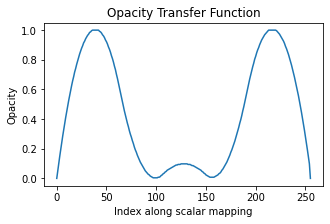

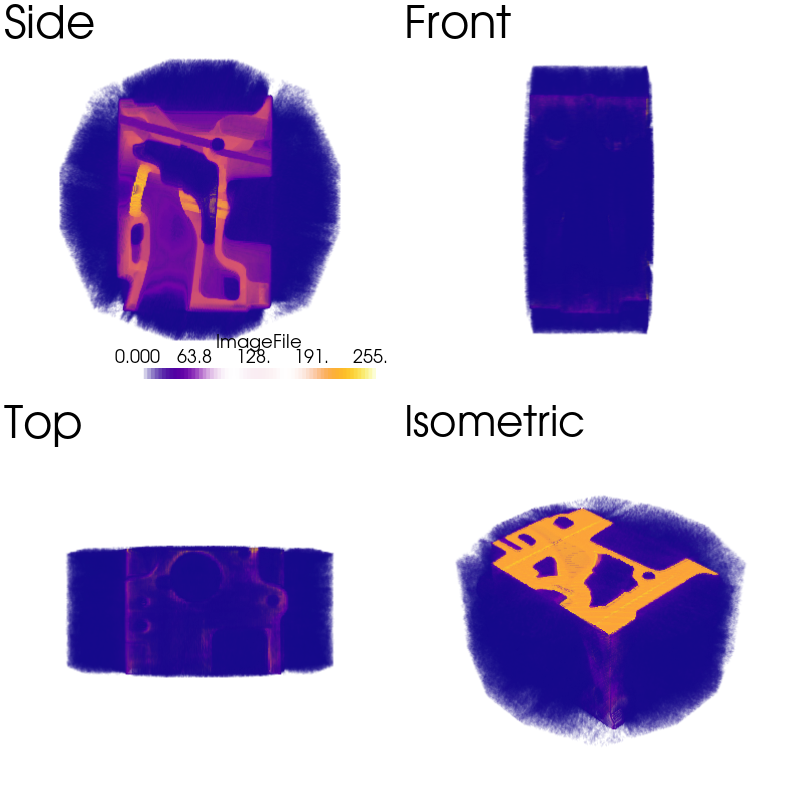

In [50]:
# Create opacity transfer functions
#opacity = [0, 0, 0.1, 0, 0, 0, 0, 0, 1, 1]
opacity = [0, 1, 0.1, 0.1, 0.1, 1, 0]
#opacity = [0, 0, 0.5, 0.8, 1, 1, 0, 0, 0, 0]

multiview(vol, opacity, 'plasma')

# Slicing

In [9]:
# slice volume in half
half = vol.extract_subset([0, 255, 0, 255, 0, 64])

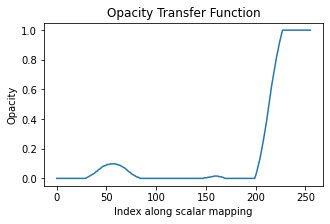

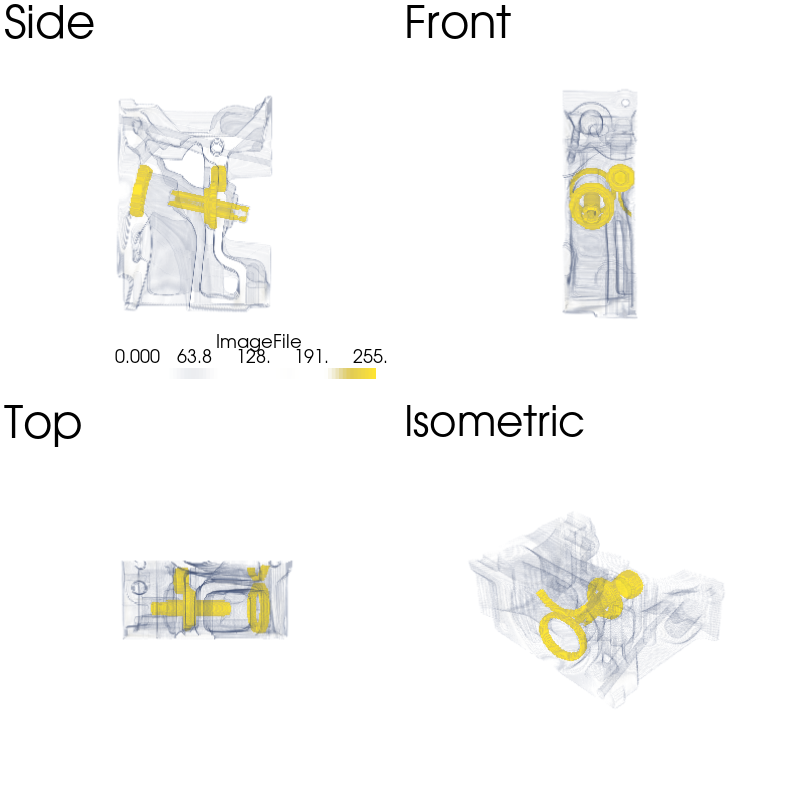

In [15]:
# Create opacity transfer functions
opacity = [0, 0, 0.1, 0, 0, 0, 0, 0, 1, 1]

multiview(half, opacity, 'cividis')

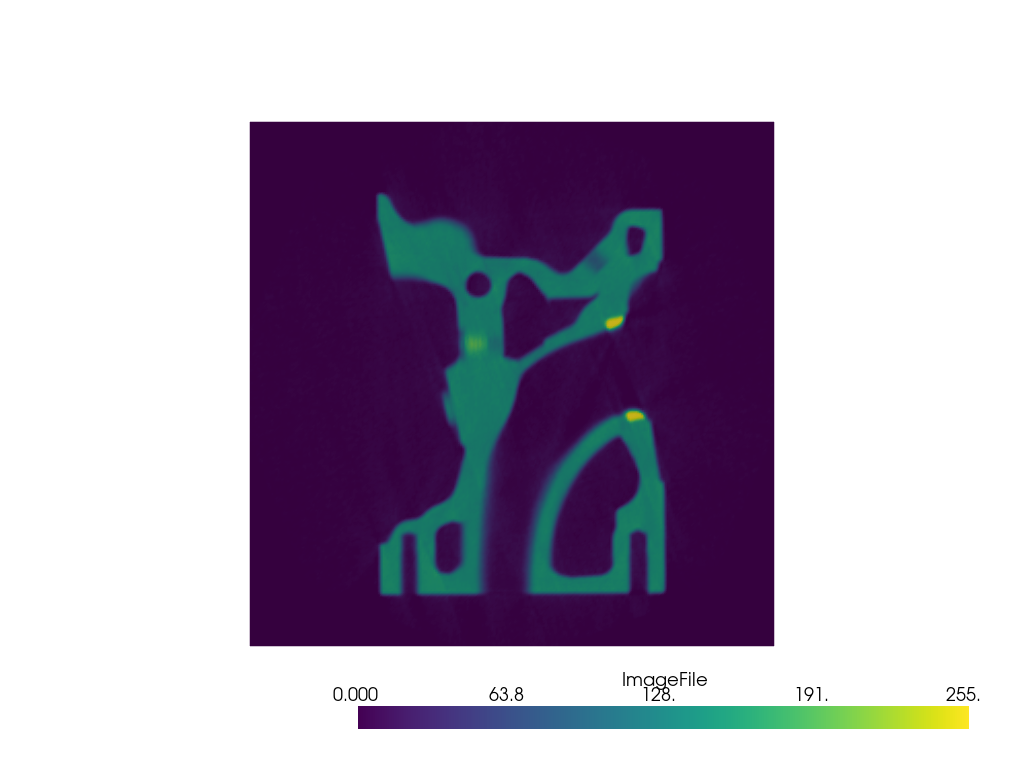

[(-0.5, -0.5, 696.1729559300638),
 (-0.5, -0.5, -0.5),
 (0.0, 1.0, 0.0)]

In [52]:
# single slice
slice = vol.slice(normal=[0,0,1])
p = pv.Plotter()
p.add_mesh(slice)
p.view_xy()
p.show()

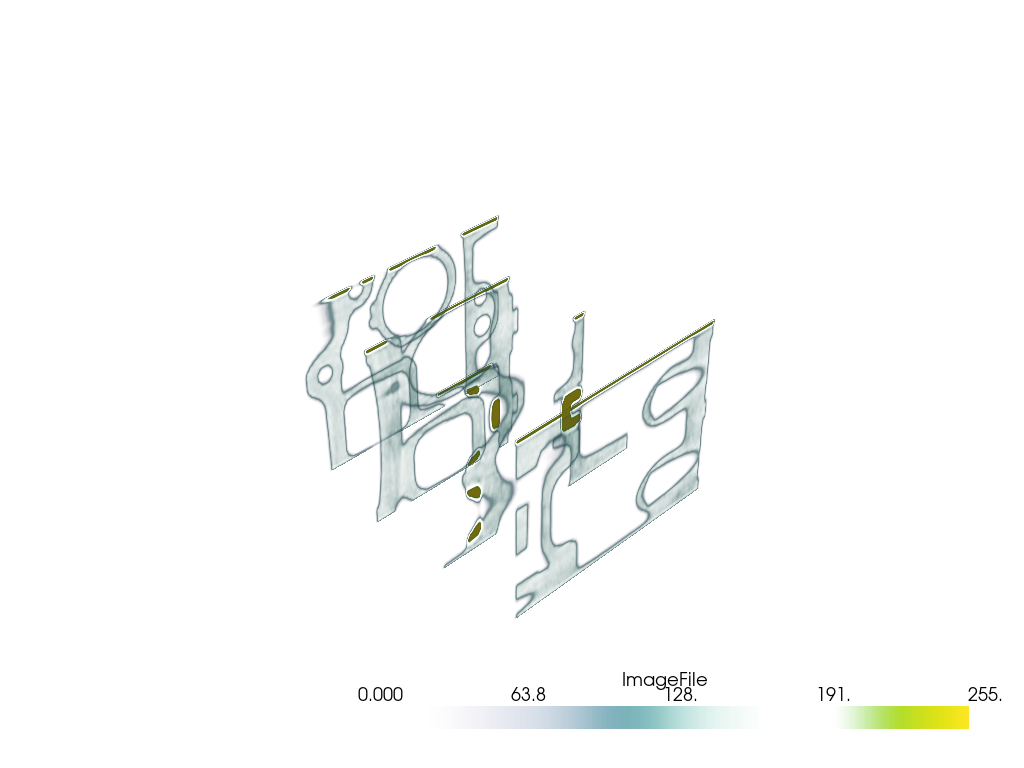

[(422.16513542277966, 422.16513542277966, 422.16513542277966),
 (-0.5, -0.5, -0.5),
 (0.0, 0.0, 1.0)]

In [80]:
# multiple slices
slice = vol.slice_along_axis(n=6, axis='y')
opacity = [0, 0, 0.1, 0.3, .6, 0.2, 0, 0, 1, 1]
p = pv.Plotter()
p.add_mesh(slice, opacity=opacity)
p.show()

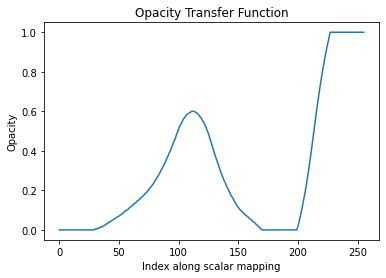

In [81]:
# Plot the opacity transfer function
tf = pv.opacity_transfer_function(opacity, 256).astype(float) / 255.
plt.xlabel('Index along scalar mapping'), plt.ylabel('Opacity'),plt.title('Opacity Transfer Function')
plt.plot(np.arange(256), tf)